# Setting Up

In [ ]:
!nvidia-smi

Fri Sep 22 12:39:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 16
seed = 42

In [ ]:
! pip install -q transformers[sentencepiece] bert_score sacrebleu fastai ohmeow-blurr datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import transformers
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *
from datasets import load_dataset

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Laptop Guru/scraped_data

/content/drive/MyDrive/Laptop Guru/scraped_data


In [ ]:
import pandas as pd


# Data

In [ ]:
dataset = pd.read_csv('modified_file.csv')
cnndm_df = pd.DataFrame(dataset)
cnndm_df.head()

,Model_Name,Model_link,Specification,Short_Description,Suggesstion_Container
0,"Lenovo IdeaPad 1 15AMN7 AMD Ryzen 5 15.6"" FHD Laptop with DDR5 RAM",https://www.startech.com.bd/lenovo-ideapad-1-15amn7-amd-ryzen-5-fhd-laptop,"Processor\nProcessor Brand AMD\nProcessor Model Ryzen 5 7520U\nProcessor Frequency 2.8 GHz – 4.3 GHz\nProcessor Core 4\nProcessor Thread 8\nCPU Cache L1 Cache: 256KB\nL2 Cache: 2MB\nL3 Cache: 4MB\nDisplay\nDisplay Size 15.6""\nDisplay Type TN\nDisplay Resolution FHD (1920 x 1080)\nTouch Screen N/A\nDisplay Features 220nits Anti-glare; 170° Viewing Angle\nMemory\nRAM 8GB (On Board)\nRAM Type DDR5\nRemovable NO\nBus Speed 5500MHz\nTotal RAM Slot 1\nStorage\nStorage Type NVMe PCIe SSD\nStorage Capacity 256GB\nExtra M.2 Slot N/A\nSupported SSD Type PCIe NVMe M.2\nStorage Upgrade Installed SSD c...","Lenovo IdeaPad 1 15AMN7 AMD Ryzen 5 15.6"" FHD Laptop with DDR5 RAM\nThe Lenovo IdeaPad 1 15AMN7 is a stylish and powerful laptop that offers high-performance computing for a variety of jobs. This laptop can perform complex programs with ease thanks to an AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz). The processor has four cores and eight threads, allowing you to multitask effectively and effortlessly. This laptop has 8GB DDR5-5500 Memory, which offers smooth performance even while running many apps at the same time. The 256 GB SSD PCIe offers plenty of storage capacity for your data, document...","Lenovo IdeaPad 1 15AMN7 AMD Ryzen 5 15.6"" FHD Laptop with DDR5 RAM, Processor\nProcessor Brand AMD\nProcessor Model Ryzen 5 7520U\nProcessor Frequency 2.8 GHz – 4.3 GHz\nProcessor Core 4\nProcessor Thread 8\nCPU Cache L1 Cache: 256KB\nL2 Cache: 2MB\nL3 Cache: 4MB\nDisplay\nDisplay Size 15.6""\nDisplay Type TN\nDisplay Resolution FHD (1920 x 1080)\nTouch Screen N/A\nDisplay Features 220nits Anti-glare; 170° Viewing Angle\nMemory\nRAM 8GB (On Board)\nRAM Type DDR5\nRemovable NO\nBus Speed 5500MHz\nTotal RAM Slot 1\nStorage\nStorage Type NVMe PCIe SSD\nStorage Capacity 256GB\nExtra M.2 Slot N/..."
1,"Lenovo IdeaPad 1 15AMN7 AMD Ryzen 5 512GB SSD 15.6"" FHD Laptop with DDR5 RAM",https://www.startech.com.bd/lenovo-ideapad-1-15amn7-amd-ryzen-5-laptop,"Processor\nProcessor Brand AMD\nProcessor Model Ryzen 5 7520U\nProcessor Frequency 2.8 GHz – 4.3 GHz\nProcessor Core 4\nProcessor Thread 8\nCPU Cache L1 Cache: 256KB\nL2 Cache: 2MB\nL3 Cache: 4MB\nDisplay\nDisplay Size 15.6""\nDisplay Type TN\nDisplay Resolution FHD (1920 x 1080)\nTouch Screen N/A\nDisplay Features 220nits Anti-glare; 170° Viewing Angle\nMemory\nRAM 8GB (On Board)\nRAM Type DDR5\nRemovable NO\nBus Speed 5500MHz\nTotal RAM Slot 1\nStorage\nStorage Type NVMe PCIe SSD\nStorage Capacity 512GB\nExtra M.2 Slot N/A\nSupported SSD Type PCIe NVMe M.2\nStorage Upgrade Installed SSD c...","Lenovo IdeaPad 1 15AMN7 AMD Ryzen 5 512GB SSD 15.6"" FHD Laptop with DDR5 RAM\nThe Lenovo IdeaPad 1 15AMN7 is a stylish and powerful laptop that offers high-performance computing for a variety of jobs. This laptop can perform complex programs with ease thanks to an AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz). The processor has four cores and eight threads, allowing you to multitask effectively and effortlessly. This laptop has 8GB DDR5-5500 Memory, which offers smooth performance even while running many apps at the same time. The 512GB SSD PCIe offers plenty of storage capacity for your data,...","Lenovo IdeaPad 1 15AMN7 AMD Ryzen 5 512GB SSD 15.6"" FHD Laptop with DDR5 RAM, Processor\nProcessor Brand AMD\nProcessor Model Ryzen 5 7520U\nProcessor Frequency 2.8 GHz – 4.3 GHz\nProcessor Core 4\nProcessor Thread 8\nCPU Cache L1 Cache: 256KB\nL2 Cache: 2MB\nL3 Cache: 4MB\nDisplay\nDisplay Size 15.6""\nDisplay Type TN\nDisplay Resolution FHD (1920 x 1080)\nTouch Screen N/A\nDisplay Features 220nits Anti-glare; 170° Viewing Angle\nMemory\nRAM 8GB (On Board)\nRAM Type DDR5\nRemovable NO\nBus Speed 5500MHz\nTotal RAM Slot 1\nStorage\nStorage Type NVMe PCIe SSD\nStorage Capacity 512GB\nExtra M..."
2,"

In [ ]:
from transformers import BartForConditionalGeneration
pretrained_model_name = "sshleifer/distilbart-cnn-6-6"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name, model_cls=BartForConditionalGeneration)
hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [ ]:
batch_tokenize_tfm = Seq2SeqBatchTokenizeTransform(
    hf_arch,
    hf_config,
    hf_tokenizer,
    hf_model,
    max_length=256,
    max_target_length=130
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm=batch_tokenize_tfm), noop)

dblock = DataBlock(blocks=blocks, get_x=ColReader("Specification"), get_y=ColReader("Suggesstion_Container") , splitter=RandomSplitter())

In [ ]:
dls = dblock.dataloaders(cnndm_df, bs=4)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
dls.show_batch(dataloaders=dls, max_n=4)

,text,target
0,"<s> Processor\nProcessor Brand Apple\nProcessor Model M2 Max chip\nProcessor Core 12-core CPU with 8 performance cores and 4 efficiency cores\nProcessor Thread 16-core Neural Engine\nCPU Cache 400GB/s memory bandwidth\nDisplay\nDisplay Size 14.2-inch\nDisplay Type Liquid Retina XDR\nDisplay Resolution 3024x1964 (254 pixels per inch)\nTouch Screen No\nRefresh Rate ProMotion technology for adaptive refresh rates up to 120Hz\nFixed refresh rates: 47.95Hz, 48.00Hz, 50.00Hz, 59.94Hz, 60.00Hz\nDisplay Features XDR (Extreme Dynamic Range)\n1,000,000:1 contrast ratio\nXDR brightness: 1000 nits sustained full-screen, 1600 nits peak (HDR content only)\nSDR brightness: 500 nits\n\nColor:\n1 billion colors\nWide color (P3)\nTrue Tone technology\n\nSimultaneously supports full native resolution on the built-in display at 1 billion colors and:\nUp to two external displays with up to 6K resolution at 60Hz over Thunderbolt, or one external display with up to 6K resolution at 60Hz over Thunderbolt and one external</s>","Apple MacBook Pro 14-inch M2 Max 32GB RAM 1TB SSD Silver (MPHK3LL/A), Processor\nProcessor Brand Apple\nProcessor Model M2 Max chip\nProcessor Core 12-core CPU with 8 performance cores and 4 efficiency cores\nProcessor Thread 16-core Neural Engine\nCPU Cache 400GB/s memory bandwidth\nDisplay\nDisplay Size 14.2-inch\nDisplay Type Liquid Retina XDR\nDisplay Resolution 3024x1964 (254 pixels per inch)\nTouch Screen No\nRefresh Rate ProMotion technology for adaptive refresh rates up to 120Hz\nFixed refresh rates: 47"
1,"<s> Processor\nProcessor Brand Apple\nProcessor Model M2 Max chip\nProcessor Core 12-core CPU with 8 performance cores and 4 efficiency cores\nProcessor Thread 16-core Neural Engine\nCPU Cache 400GB/s memory bandwidth\nDisplay\nDisplay Size 14.2-inch\nDisplay Type Liquid Retina XDR\nDisplay Resolution 3024x1964 (254 pixels per inch)\nTouch Screen No\nRefresh Rate ProMotion technology for adaptive refresh rates up to 120Hz\nFixed refresh rates: 47.95Hz, 48.00Hz, 50.00Hz, 59.94Hz, 60.00Hz\nDisplay Features XDR (Extreme Dynamic Range)\n1,000,000:1 contrast ratio\nXDR brightness: 1000 nits sustained full-screen, 1600 nits peak (HDR content only)\nSDR brightness: 500 nits\n\nColor:\n1 billion colors\nWide color (P3)\nTrue Tone technology\n\nSimultaneously supports full native resolution on the built-in display at 1 billion colors and:\nUp to two external displays with up to 6K resolution at 60Hz over Thunderbolt, or one external display with up to 6K resolution at 60Hz over Thunderbolt and one external</s>","Apple MacBook Pro 14-inch M2 Max 64GB RAM 4TB SSD Space Gray (Z17G002TU), Processor\nProcessor Brand Apple\nProcessor Model M2 Max chip\nProcessor Core 12-core CPU with 8 performance cores and 4 efficiency cores\nProcessor Thread 16-core Neural Engine\nCPU Cache 400GB/s memory bandwidth\nDisplay\nDisplay Size 14.2-inch\nDisplay Type Liquid Retina XDR\nDisplay Resolution 3024x1964 (254 pixels per inch)\nTouch Screen No\nRefresh Rate ProMotion technology for adaptive refresh rates up to 120Hz\nFixed refresh rates:"
2,"<s> Processor\nProcessor Brand Intel\nProcessor Model i7-12700H\nGeneration 12th Gen\nProcessor Frequency 2.3 GHz up to 4.7 GHz\nProcessor Core 14 (Performance-cores: 6, Efficient-cores: 8)\nProcessor Thread 20\nCPU Cache 24 MB\nDisplay\nDisplay Size 14.5-inch\nDisplay Type OLED\nDisplay Resolution 2.8K (2880 x 1800)\nTouch Screen Yes\nRefresh Rate 120Hz\nResponse TIme 0.2ms\nDisplay Features Aspect Ratio: 16:10\nPeak Brightness: 550nits HDR peak brightness\nColor gamut: 100% DCI-P3 color gamut\nContrast ratio: 1,000,000:1\nVESA CERTIFIED Display HDR: VESA CERTIFIED Display HDR True Black 500\nColor depth: 1.07 billion colors\nPantone: PANTONE Validated\nLow blue light: 70% less harmful blue light\nSGS Eye Care Display: SGS Eye Care Display\nScreen-to-body ratio: 93 ％\n\nScreenPad Plus (12.7"" 2880 x 864 IPS-level Panel Support</s>","ASUS Zenbook Pro 14 Duo OLED UX8402ZA-M3031W Core i7 12th

# Training

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
seq2seq_metrics = {
    "rouge": {
        "compute_kwargs": {"rouge_types": ["rouge1", "rouge2", "rougeL", "rougeLsum"], "use_stemmer": True},
        "returns": ["rouge1", "rouge2", "rougeL", "rougeLsum"],
    },
    "bertscore": {"compute_kwargs": {"lang": "en"}, "returns": ["precision", "recall", "f1"]},
}

In [ ]:
model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(
    dls,
    model,
    opt_func=partial(Adam),
    loss_func=CrossEntropyLossFlat(),
    cbs=learn_cbs,
    splitter=partial(blurr_seq2seq_splitter, arch=hf_arch),
)

# Stage - 0

In [ ]:
learn.freeze()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


SuggestedLRs(minimum=0.0003019951749593019, steep=7.585775847473997e-07, valley=3.630780702224001e-05, slide=6.30957365501672e-05)

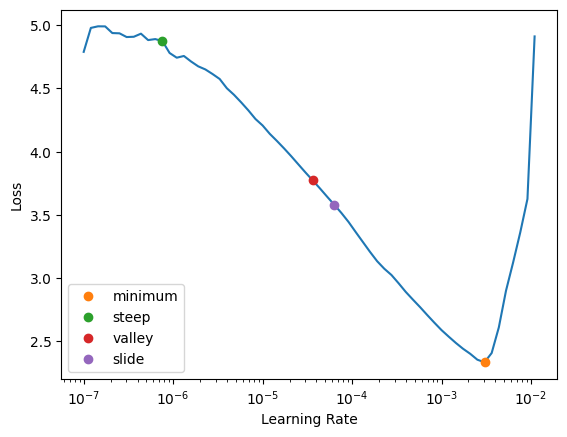

In [ ]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [ ]:
learn.fit_one_cycle(8, lr_max=3e-4, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,rougeLsum,bertscore_precision,bertscore_recall,bertscore_f1,time
0,0.672885,0.402593,0.757160,0.678128,0.744772,0.754378,0.952496,0.938186,0.945112,02:29
1,0.407815,0.333173,0.748437,0.681760,0.736216,0.747447,0.947790,0.935855,0.941641,02:03
2,0.274746,0.266919,0.816354,0.741967,0.800605,0.817001,0.954482,0.955935,0.955179,02:06
3,0.208216,0.209184,0.704508,0.624962,0.689392,0.702971,0.930185,0.929636,0.929876,02:02
4,0.146311,0.186491,0.803823,0.736827,0.795622,0.803824,0.954126,0.950351,0.952168,01:59
5,0.102544,0.171371,0.677559,0.597061,0.646899,0.675610,0.920450,0.926807,0.923602,02:04
6,0.067964,0.173389,0.687476,0.617981,0.667178,0.685666,0.923340,0.929658,0.926478,02:03
7,0.051086,0.180409,0.685879,0.614747,0.663676,0.684523,0.922279,0.928474,0.925353,02:03


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your 

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your 

In [ ]:
learn.save("laptop_summarizer")

Path('models/laptop_summarizer.pth')

In [ ]:
learn.metrics = None
learn.export("laptop_summarizer.pkl")

# Stage - 1

In [ ]:
learn.unfreeze()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


SuggestedLRs(minimum=1.318256749982538e-07, steep=7.585775847473997e-07, valley=1.737800812406931e-05, slide=2.511886486900039e-05)

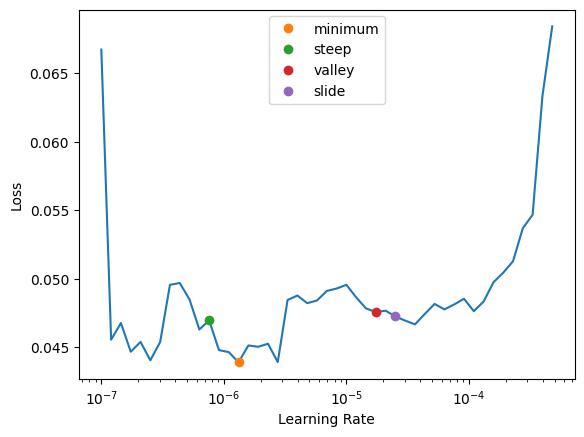

In [ ]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [ ]:
learn.fit_one_cycle(8, lr_max=slice(1e-5, 3e-5), cbs=fit_cbs)


epoch,train_loss,valid_loss,time
0,0.046916,0.188116,02:21
1,0.053986,0.179755,02:19
2,0.053304,0.183638,02:22
3,0.043672,0.195656,02:19
4,0.037682,0.198158,02:20
5,0.032148,0.202928,02:21
6,0.027896,0.206179,02:21
7,0.024748,0.207362,02:21


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your 

In [ ]:
learn.save("laptop_summarizer_1")

Path('models/laptop_summarizer_1.pth')

In [ ]:
learn.metrics = None
learn.export("laptop_summarizer_1.pkl")

# Inference

In [ ]:
inf_learn = load_learner(fname="laptop_summarizer_1.pkl")

In [ ]:


# Your input text
input_text = "Processor\nProcessor Brand Intel\nProcessor Model i7-12700H\nGeneration 12th Gen\nProcessor Frequency 2.3 GHz up to 4.7 GHz\nProcessor Core 14 (Performance-cores: 6, Efficient-cores: 8)\nProcessor Thread 20\nCPU Cache 24 MB\nDisplay\nDisplay Size 14.5-inch\nDisplay Type OLED\nDisplay Resolution 2.8K (2880 x 1800)\nTouch Screen Yes\nRefresh Rate 120Hz\nResponse TIme 0.2ms\nDisplay Features Aspect Ratio: 16:10\nPeak Brightness: 550nits HDR peak brightness\nColor gamut: 100% DCI-P3 color gamut\nContrast ratio: 1,000,000:1\nVESA CERTIFIED Display HDR: VESA CERTIFIED Display HDR True Black 500\nColor depth: 1.07 billion colors\nPantone: PANTONE Validated\nLow blue light: 70% less harmful blue light\nSGS Eye Care Display: SGS Eye Care Display"

# Generate predictions
prediction = inf_learn.blurr_generate(input_text)

# Access the generated text
generated_text = prediction[0]['generated_texts']

# Print or use the generated text
print(generated_text)


 ASUS Zenbook Pro 14 Duo OLED UX8402ZA-M3031W Core i7 12th Gen 14.5" 2.8K Touch Laptop, Processor
Processor Brand Intel attRotProcessor Model i7-12700H
Generation 12thGen
processor Frequency 2.3 GHz up to 4.7 GHz
Display Core 14 (Performance-cores: 6, Efficient-core: 8)
Processors Thread 20
CPU Cache 24 MB
Display
Display Size 14.05-inch
Display Type OLED
Display Resolution 2. 8K (2880 x 1800
